In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matplotlib.style.use('seaborn')
sns.set(style='whitegrid', color_codes=True)

save_path = './figures'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

save_type = 'png' 

In [3]:
def draw_err_bar(x, y, y_err, label=None, shape='-^'):
    plt.plot(x, y*100, shape, label=label, markersize=8.5, linewidth=2)
    plt.fill_between(x, (y-y_err)*100, (y+y_err)*100, alpha=0.2)

In [4]:
def draw_pic(name, path):
    with open(path, 'rb') as f:
        dat = pickle.load(f)
    print(dat.keys())
    print(dat['pd'].keys())
    fig = plt.figure(figsize=(8,7)).add_subplot(111)
    fig.set_title('Results of {}'.format(name), fontsize=20)
    fig.set_xlabel('Removed Quantity', fontsize=18)
    fig.set_ylabel('Error (%)', fontsize=18)
    fig.tick_params(labelsize=18)
    plt.xlim([0-200,6000+200])
    plt.ylim([0-4,100+4])
    plt.subplots_adjust(left=0.13, right=0.95, bottom=0.12, top=0.95)
    
    
    x = [0, 1e3, 2e3, 3e3, 4e3, 5e3, 6e3]
    
    o_del_err, o_del_std = dat['npd']['del_err'][0], dat['npd']['del_err_std'][0]
    o_res_err, o_res_std = dat['npd']['res_err'][0], dat['npd']['res_err_std'][0]
    
    draw_err_bar(x, np.append(o_del_err,dat['pd']['del_err']), np.append(o_del_std,dat['pd']['del_err_std']), label='Processed on S_f', shape='-^')
    draw_err_bar(x, np.append(o_del_err,dat['sc']['del_err']), np.append(o_del_std,dat['sc']['del_err_std']), label='Target on S_f', shape='--^')
    
    draw_err_bar(x, np.append(o_res_err,dat['pd']['res_err']), np.append(o_res_std,dat['pd']['res_err_std']), label='Processed on S_r', shape='-^')
    draw_err_bar(x, np.append(o_res_err,dat['sc']['res_err']), np.append(o_res_std,dat['sc']['res_err_std']), label='Target on S_r', shape='--^')
    
    draw_err_bar(x, np.append(o_del_err,dat['pd']['test_err']), np.append(o_del_std,dat['pd']['test_err_std']), label='Processed on S_test', shape='-^')
    draw_err_bar(x, np.append(o_del_err,dat['sc']['test_err']), np.append(o_del_std,dat['sc']['test_err_std']), label='Target on S_test', shape='--^')
    
    plt.legend(loc='upper left', fontsize=20)
    plt.savefig('./{}/fashion-{}.{}'.format(save_path, name, save_type))

dict_keys(['pd', 'npd', 'sc'])
dict_keys(['res_err', 'del_err', 'test_err', 'res_err_std', 'del_err_std', 'test_err_std'])
dict_keys(['pd', 'npd', 'sc'])
dict_keys(['res_err', 'del_err', 'test_err', 'res_err_std', 'del_err_std', 'test_err_std'])
dict_keys(['pd', 'npd', 'sc'])
dict_keys(['res_err', 'del_err', 'test_err', 'res_err_std', 'del_err_std', 'test_err_std'])


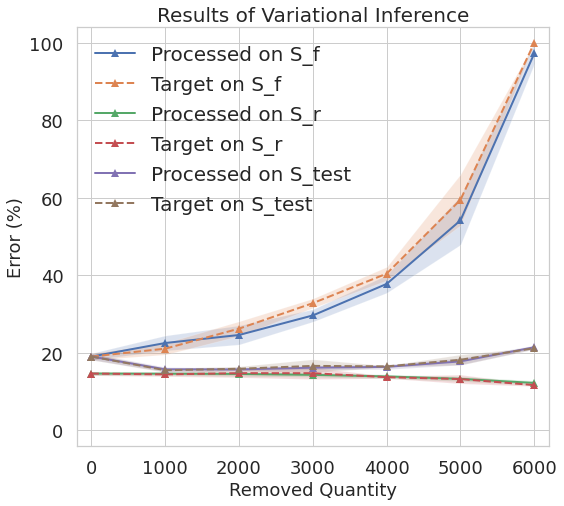

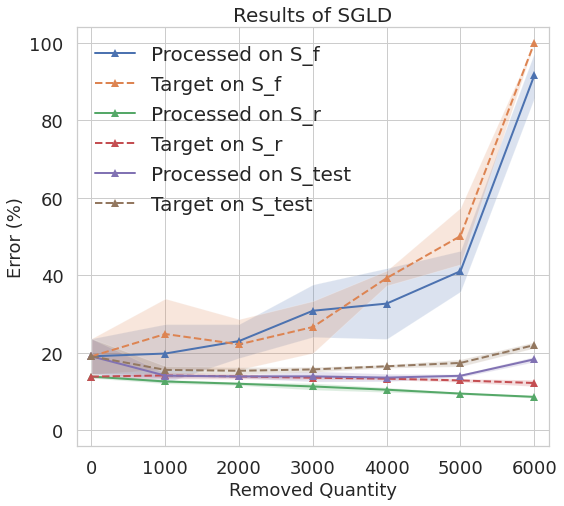

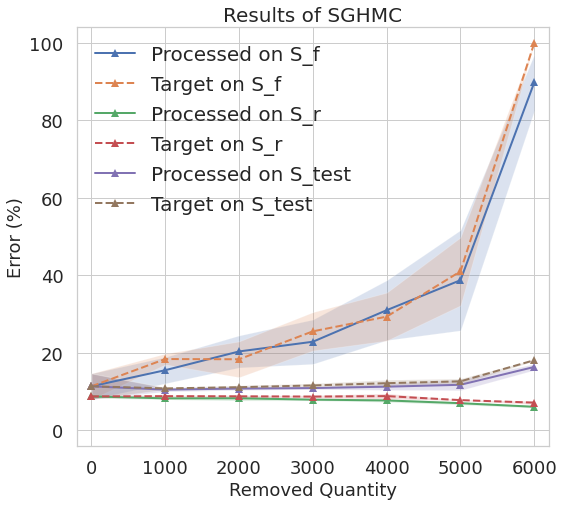

In [5]:
draw_pic('Variational Inference', '../exp_data/fashion/save-db-svi.pkl')
draw_pic('SGLD', '../exp_data/fashion/save-db-sgld.pkl')
draw_pic('SGHMC', '../exp_data/fashion/save-db-sghmc.pkl')